In [1]:
import cv2
import numpy as np
import tensorflow as tf
import scipy.special
import matplotlib.pyplot as plt

In [10]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./brain_tumor_cnn_Fullmodel.h5
./brain_tumor_VGG16_Full.h5
./Load_Models_Base_CNN.ipynb
./Load_Model_VGG16.ipynb


In [1]:
import tensorflow as tf

# Load the trained model from .h5 file
model = tf.keras.models.load_model("./brain_tumor_cnn_Fullmodel.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 240, 240, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,397,030 (28.22 MB)

 Trainable params: 7,397,028 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [20]:
import cv2
import numpy as np
from PIL import Image
def preprocess_image(image_path, target_size=(240, 240)):  # Change size if needed
    image=cv2.imread(image_path)
    img_original = image.copy()
    image=Image.fromarray(image,'RGB')
    image=image.resize((240,240)) # Resize to match model input size
    image= np.array(image)
    img = image / 255.0  # Normalize pixel values (0-1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img, img_original

<class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


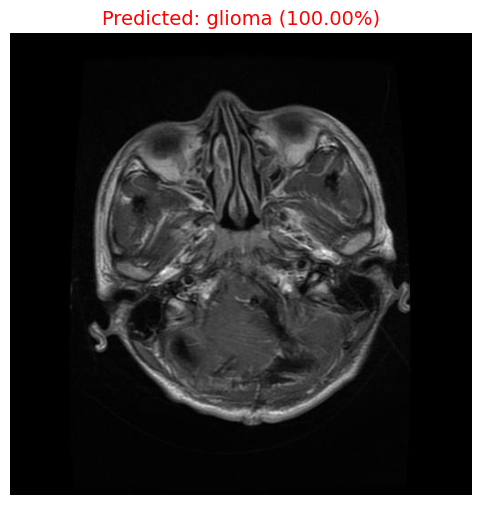

In [ ]:
# Define class labels (must match your dataset classes)

class_names = ['notumor', 'glioma', 'meningioma', 'pituitary']

# Load and preprocess image
image_path = "Te-gl_0024.jpg"  # Change to your image path
# image_path = "C:\Users\Shari\OneDrive - iut-dhaka.edu\7th Semester\Projects\Emon\archive\Testing\glioma\Te-gl_000.jpg"  # Change to your image path
processed_image, original_image = preprocess_image(image_path)

# Get model predictions
raw_predictions = model.predict(processed_image)  # Output logits (before softmax)

# Convert to probabilities
import scipy.special
probabilities = scipy.special.softmax(raw_predictions, axis=-1)

# Get predicted class
predicted_class_index = np.argmax(probabilities)  # Get index of highest probability
predicted_class = class_names[predicted_class_index]  # Map index to class name
confidence = probabilities[0][predicted_class_index] * 100
plt.figure(figsize=(6,6))
plt.imshow(original_image)  # Show original image
plt.axis('off')  # Hide axes
plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)", fontsize=14, color='red')
plt.show()